# **1. Loading the required libraries and modules**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, RocCurveDisplay, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# **2. Data Understanding & Pre-processing**

## *2.1 Data exploration*

In [ ]:
Males_VF_Dataset = pd.read_csv('/content/drive/MyDrive/DMM/Raw_Males_VF_Dataset.csv')

In [ ]:
Males_VF_Dataset.shape

(2864, 16)

In [ ]:
Males_VF_Dataset.columns

Index(['SUBJECT_ID', 'SEX', 'AGE_years', 'BMI', 'HEIGHT_cm', 'WEIGHT_kg',
       'WAIST_CIRCUMFERENCE_cm', 'DIASTOLIC_BLOOD_PRESSURE_mmHg',
       'SYSTOLIC_BLOOD_PRESSURE_mmHg', 'WALK_DURATION_PER_DAY_MINUTES',
       'COMPUTER_USE_TIME_PER_DAY_HOURS', 'SMOKING_STATUS', 'DISCONTINUED_NO_',
       'CIGARETTES_CONSUMED_PER_DAY', 'Visceral_Fat_Volume_Litres', 'Outcome'],
      dtype='object')

In [ ]:
Males_VF_Dataset.dtypes

SUBJECT_ID                          object
SEX                                 object
AGE_years                            int64
BMI                                  int64
HEIGHT_cm                          float64
WEIGHT_kg                          float64
WAIST_CIRCUMFERENCE_cm               int64
DIASTOLIC_BLOOD_PRESSURE_mmHg        int64
SYSTOLIC_BLOOD_PRESSURE_mmHg       float64
WALK_DURATION_PER_DAY_MINUTES        int64
COMPUTER_USE_TIME_PER_DAY_HOURS      int64
SMOKING_STATUS                     float64
DISCONTINUED_NO_                    object
CIGARETTES_CONSUMED_PER_DAY        float64
Visceral_Fat_Volume_Litres         float64
Outcome                              int64
dtype: object

In [ ]:
Males_VF_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SUBJECT_ID                       2864 non-null   object 
 1   SEX                              2864 non-null   object 
 2   AGE_years                        2864 non-null   int64  
 3   BMI                              2864 non-null   int64  
 4   HEIGHT_cm                        2864 non-null   float64
 5   WEIGHT_kg                        2864 non-null   float64
 6   WAIST_CIRCUMFERENCE_cm           2864 non-null   int64  
 7   DIASTOLIC_BLOOD_PRESSURE_mmHg    2864 non-null   int64  
 8   SYSTOLIC_BLOOD_PRESSURE_mmHg     2859 non-null   float64
 9   WALK_DURATION_PER_DAY_MINUTES    2864 non-null   int64  
 10  COMPUTER_USE_TIME_PER_DAY_HOURS  2864 non-null   int64  
 11  SMOKING_STATUS                   2862 non-null   float64
 12  DISCONTINUED_NO_    

In [ ]:
# first 10 records of the possible input variables and the class variable

Males_VF_Dataset[['AGE_years', 'BMI', 'HEIGHT_cm', 'WEIGHT_kg', 'WAIST_CIRCUMFERENCE_cm',
       'DIASTOLIC_BLOOD_PRESSURE_mmHg', 'SYSTOLIC_BLOOD_PRESSURE_mmHg',
       'WALK_DURATION_PER_DAY_MINUTES', 'COMPUTER_USE_TIME_PER_DAY_HOURS',
       'CIGARETTES_CONSUMED_PER_DAY', 'Outcome']].head(10)


,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,CIGARETTES_CONSUMED_PER_DAY,Outcome
0,47,46,187.0,152.24,154,133,178.0,52,7,NaN,0
1,52,54,182.0,167.36,139,111,187.0,50,3,NaN,0
2,62,28,175.0,82.92,93,118,160.0,58,6,NaN,0
3,56,26,1.8,76.45,85,91,139.0,151,2,NaN,0
4,48,25,1.7,65.36,84,76,98.0,257,6,NaN,0
5,70,27,180.0,76.57,95,83,127.0,68,5,NaN,0
6,65,21,189.0,63.37,76,93,123.0,85,3,NaN,0
7,54,24,192.0,81.79,87,81,123.0,38,10,NaN,0
8,49,23,189.0,74.41,80,95,136.0,44,3,NaN,0
9,57,26,188.0,84.00,91,82,109.0,61,0,NaN,0


In [ ]:
# statistical description of the selected dataset attributes

Males_VF_Dataset[['AGE_years', 'BMI', 'HEIGHT_cm', 'WEIGHT_kg', 'WAIST_CIRCUMFERENCE_cm',
       'DIASTOLIC_BLOOD_PRESSURE_mmHg', 'SYSTOLIC_BLOOD_PRESSURE_mmHg',
       'WALK_DURATION_PER_DAY_MINUTES', 'COMPUTER_USE_TIME_PER_DAY_HOURS',
       'CIGARETTES_CONSUMED_PER_DAY', 'Outcome']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE_years,2864.0,62.324721,8.509000,41.00,57.0000,63.000,69.00,190.00
BMI,2864.0,29.284567,3.885323,20.00,27.0000,29.000,31.00,54.00
HEIGHT_cm,2864.0,182.935929,8.671651,1.70,178.0000,183.000,188.00,210.00
WEIGHT_kg,2864.0,91.345150,13.678241,55.41,81.9175,89.725,98.74,168.77
WAIST_CIRCUMFERENCE_cm,2864.0,99.055168,10.137395,70.00,92.0000,98.000,105.00,154.00
DIASTOLIC_BLOOD_PRESSURE_mmHg,2864.0,91.596718,10.631628,48.00,84.0000,91.000,99.00,133.00
SYSTOLIC_BLOOD_PRESSURE_mmHg,2859.0,133.770199,16.834580,90.00,122.0000,132.000,144.00,192.00
WALK_DURATION_PER_DAY_MINUTES,2864.0,81.696578,64.805761,1.00,46.0000,67.000,92.00,656.00
COMPUTER_USE_TIME_PER_DAY_HOURS,2864.0,4.531425,4.421835,0.00,2.0000,3.000,6.00,69.00
CIGARETTES_CONSUMED_PER_DAY,129.0,23.527132,13.259476,2.00,12.0000,22.000,34.00,50.00


In [ ]:
# measurement scale type of the selected dataset attributes

Males_VF_Dataset[['AGE_years', 'BMI', 'HEIGHT_cm', 'WEIGHT_kg', 'WAIST_CIRCUMFERENCE_cm',
       'DIASTOLIC_BLOOD_PRESSURE_mmHg', 'SYSTOLIC_BLOOD_PRESSURE_mmHg',
       'WALK_DURATION_PER_DAY_MINUTES', 'COMPUTER_USE_TIME_PER_DAY_HOURS',
       'CIGARETTES_CONSUMED_PER_DAY', 'Outcome']].dtypes

AGE_years                            int64
BMI                                  int64
HEIGHT_cm                          float64
WEIGHT_kg                          float64
WAIST_CIRCUMFERENCE_cm               int64
DIASTOLIC_BLOOD_PRESSURE_mmHg        int64
SYSTOLIC_BLOOD_PRESSURE_mmHg       float64
WALK_DURATION_PER_DAY_MINUTES        int64
COMPUTER_USE_TIME_PER_DAY_HOURS      int64
CIGARETTES_CONSUMED_PER_DAY        float64
Outcome                              int64
dtype: object

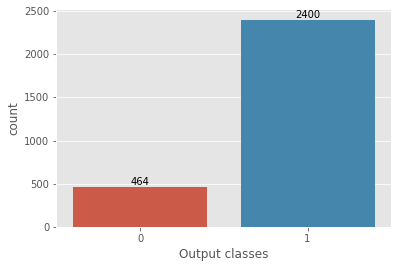

In [ ]:
# Class 0 = No Intervention Required
# Class 1 = Intervention Required

Output_classes = Males_VF_Dataset.Outcome.to_list()
ax = sns.countplot(x=Output_classes)
ax.bar_label(ax.containers[0])
plt.xlabel('Output classes')
plt.show()

## *2.2 Cleaning & Transforming the data*

### 2.2.1 Dealing with incorrect & incomplete data

In [ ]:
Males_VF_Dataset.isna().sum()

SUBJECT_ID                            0
SEX                                   0
AGE_years                             0
BMI                                   0
HEIGHT_cm                             0
WEIGHT_kg                             0
WAIST_CIRCUMFERENCE_cm                0
DIASTOLIC_BLOOD_PRESSURE_mmHg         0
SYSTOLIC_BLOOD_PRESSURE_mmHg          5
WALK_DURATION_PER_DAY_MINUTES         0
COMPUTER_USE_TIME_PER_DAY_HOURS       0
SMOKING_STATUS                        2
DISCONTINUED_NO_                   2862
CIGARETTES_CONSUMED_PER_DAY        2735
Visceral_Fat_Volume_Litres            0
Outcome                               0
dtype: int64

In [ ]:
Males_VF_Dataset.isna().sum()/len(Males_VF_Dataset)*100

SUBJECT_ID                          0.000000
SEX                                 0.000000
AGE_years                           0.000000
BMI                                 0.000000
HEIGHT_cm                           0.000000
WEIGHT_kg                           0.000000
WAIST_CIRCUMFERENCE_cm              0.000000
DIASTOLIC_BLOOD_PRESSURE_mmHg       0.000000
SYSTOLIC_BLOOD_PRESSURE_mmHg        0.174581
WALK_DURATION_PER_DAY_MINUTES       0.000000
COMPUTER_USE_TIME_PER_DAY_HOURS     0.000000
SMOKING_STATUS                      0.069832
DISCONTINUED_NO_                   99.930168
CIGARETTES_CONSUMED_PER_DAY        95.495810
Visceral_Fat_Volume_Litres          0.000000
Outcome                             0.000000
dtype: float64

In [ ]:
Males_VF_Dataset.head(10)

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Outcome
0,B0011,M,47,46,187.0,152.24,154,133,178.0,52,7,0.0,XNBH,NaN,-0.76,0
1,B0012,M,52,54,182.0,167.36,139,111,187.0,50,3,0.0,NaN,NaN,-0.59,0
2,B0013,M,62,28,175.0,82.92,93,118,160.0,58,6,0.0,NaN,NaN,0.59,0
3,B0014,M,56,26,1.8,76.45,85,91,139.0,151,2,0.0,NaN,NaN,0.50,0
4,B0015,M,48,25,1.7,65.36,84,76,98.0,257,6,0.0,NaN,NaN,0.39,0
5,B0016,M,70,27,180.0,76.57,95,83,127.0,68,5,0.0,NaN,NaN,0.27,0
6,B0017,M,65,21,189.0,63.37,76,93,123.0,85,3,0.0,NaN,NaN,0.24,0
7,B0018,M,54,24,192.0,81.79,87,81,123.0,38,10,0.0,NaN,NaN,0.23,0
8,B0019,M,49,23,189.0,74.41,80,95,136.0,44,3,0.0,NaN,NaN,0.22,0
9,B0020,M,57,26,188.0,84.00,91,82,109.0,61,0,0.0,NaN,NaN,0.18,0


In [ ]:
Males_VF_Dataset.drop('SUBJECT_ID', axis=1, inplace=True)
Males_VF_Dataset.drop('SEX', axis=1, inplace=True)
Males_VF_Dataset.drop('DISCONTINUED_NO_', axis=1, inplace=True)
Males_VF_Dataset.drop('Visceral_Fat_Volume_Litres', axis=1, inplace=True)

In [ ]:
Males_VF_Dataset.head(10)

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Outcome
0,47,46,187.0,152.24,154,133,178.0,52,7,0.0,NaN,0
1,52,54,182.0,167.36,139,111,187.0,50,3,0.0,NaN,0
2,62,28,175.0,82.92,93,118,160.0,58,6,0.0,NaN,0
3,56,26,1.8,76.45,85,91,139.0,151,2,0.0,NaN,0
4,48,25,1.7,65.36,84,76,98.0,257,6,0.0,NaN,0
5,70,27,180.0,76.57,95,83,127.0,68,5,0.0,NaN,0
6,65,21,189.0,63.37,76,93,123.0,85,3,0.0,NaN,0
7,54,24,192.0,81.79,87,81,123.0,38,10,0.0,NaN,0
8,49,23,189.0,74.41,80,95,136.0,44,3,0.0,NaN,0
9,57,26,188.0,84.00,91,82,109.0,61,0,0.0,NaN,0


In [ ]:
Males_VF_Dataset[Males_VF_Dataset["COMPUTER_USE_TIME_PER_DAY_HOURS"] > 24]

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Outcome
317,49,29,176.5,81.59,87,71,103.0,65,30,0.0,NaN,0
326,48,24,187.0,74.07,82,75,100.0,67,32,0.0,NaN,0
715,50,26,189.0,83.29,88,72,119.0,48,27,0.0,NaN,1
1126,51,27,182.0,78.61,90,99,133.0,61,30,0.0,11.0,1
1180,69,26,179.0,75.62,94,84,121.0,102,69,0.0,NaN,1
1249,69,31,183.0,92.96,103,85,146.0,86,35,0.0,NaN,1
1338,53,25,182.0,78.17,92,98,116.0,91,25,0.0,NaN,1
1587,48,31,200.0,117.11,104,85,121.0,68,46,0.0,NaN,1
2326,47,33,186.0,102.39,108,108,133.0,80,32,0.0,NaN,1
2606,57,29,198.0,103.16,106,105,178.0,11,25,0.0,NaN,1


In [ ]:
Males_VF_Dataset.drop(Males_VF_Dataset[Males_VF_Dataset.COMPUTER_USE_TIME_PER_DAY_HOURS > 24].index, inplace=True)

In [ ]:
Males_VF_Dataset[Males_VF_Dataset["COMPUTER_USE_TIME_PER_DAY_HOURS"] > 24]

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Outcome


In [ ]:
Males_VF_Dataset[Males_VF_Dataset['SYSTOLIC_BLOOD_PRESSURE_mmHg'].isna()]

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Outcome
127,63,26,182.0,82.65,95,116,NaN,65,0,0.0,NaN,0
1084,62,28,185.0,91.19,97,116,NaN,77,4,0.0,NaN,1
2291,77,31,181.0,90.32,98,104,NaN,31,9,0.0,NaN,1
2734,57,29,181.0,89.24,98,115,NaN,97,0,0.0,NaN,1
2833,62,40,179.0,119.38,122,118,NaN,79,12,0.0,NaN,1


In [ ]:
Males_VF_Dataset.fillna({'SYSTOLIC_BLOOD_PRESSURE_mmHg' : Males_VF_Dataset['SYSTOLIC_BLOOD_PRESSURE_mmHg'].mean()}, inplace=True)

In [ ]:
Males_VF_Dataset.SYSTOLIC_BLOOD_PRESSURE_mmHg.isna().sum()

0

In [ ]:
Males_VF_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2852 entries, 0 to 2863
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   AGE_years                        2852 non-null   int64  
 1   BMI                              2852 non-null   int64  
 2   HEIGHT_cm                        2852 non-null   float64
 3   WEIGHT_kg                        2852 non-null   float64
 4   WAIST_CIRCUMFERENCE_cm           2852 non-null   int64  
 5   DIASTOLIC_BLOOD_PRESSURE_mmHg    2852 non-null   int64  
 6   SYSTOLIC_BLOOD_PRESSURE_mmHg     2852 non-null   float64
 7   WALK_DURATION_PER_DAY_MINUTES    2852 non-null   int64  
 8   COMPUTER_USE_TIME_PER_DAY_HOURS  2852 non-null   int64  
 9   SMOKING_STATUS                   2850 non-null   float64
 10  CIGARETTES_CONSUMED_PER_DAY      128 non-null    float64
 11  Outcome                          2852 non-null   int64  
dtypes: float64(5), int64

In [ ]:
# if CIGARETTES_CONSUMED_PER_DAY > 0 then SMOKING_STATUS = 1

for i in range(Males_VF_Dataset.shape[0]):
  if (Males_VF_Dataset.iat[i, 10] > 0):
    Males_VF_Dataset.iat[i, 9] = 1

In [ ]:
# if SMOKING_STATUS == 0 then CIGARETTES_CONSUMED_PER_DAY = 0

for i in range(Males_VF_Dataset.shape[0]):
  if (Males_VF_Dataset.iat[i, 9] == 0):
    Males_VF_Dataset.iat[i, 10] = 0

In [ ]:
Males_VF_Dataset.isna().sum()

AGE_years                          0
BMI                                0
HEIGHT_cm                          0
WEIGHT_kg                          0
WAIST_CIRCUMFERENCE_cm             0
DIASTOLIC_BLOOD_PRESSURE_mmHg      0
SYSTOLIC_BLOOD_PRESSURE_mmHg       0
WALK_DURATION_PER_DAY_MINUTES      0
COMPUTER_USE_TIME_PER_DAY_HOURS    0
SMOKING_STATUS                     0
CIGARETTES_CONSUMED_PER_DAY        0
Outcome                            0
dtype: int64

### 2.2.2 Dealing with outliers


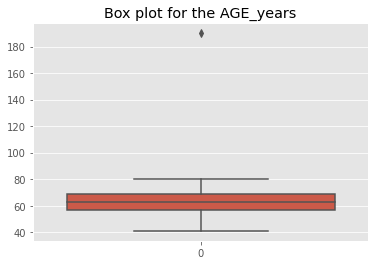

In [ ]:
sns.boxplot(Males_VF_Dataset['AGE_years'])
plt.title('Box plot for the AGE_years')
plt.show()

In [ ]:
Males_VF_Dataset[Males_VF_Dataset["AGE_years"] > 100]

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Outcome
1306,190,32,161.0,78.56,104,82,135.0,57,3,0.0,0.0,1


In [ ]:
Males_VF_Dataset.drop(Males_VF_Dataset[Males_VF_Dataset.AGE_years > 100].index, inplace=True)

In [ ]:
Males_VF_Dataset[Males_VF_Dataset["AGE_years"] > 100]

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Outcome


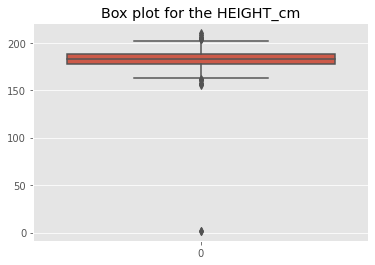

In [ ]:
sns.boxplot(Males_VF_Dataset['HEIGHT_cm'])
plt.title('Box plot for the HEIGHT_cm')
plt.show()

In [ ]:
Males_VF_Dataset[Males_VF_Dataset["HEIGHT_cm"] < 140]

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Outcome
3,56,26,1.8,76.45,85,91,139.0,151,2,0.0,0.0,0
4,48,25,1.7,65.36,84,76,98.0,257,6,0.0,0.0,0


In [ ]:
Males_VF_Dataset.drop(Males_VF_Dataset[Males_VF_Dataset.HEIGHT_cm < 140].index, inplace=True)

In [ ]:
Males_VF_Dataset[Males_VF_Dataset["HEIGHT_cm"] < 140]

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Outcome


In [ ]:
Males_VF_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2849 entries, 0 to 2863
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   AGE_years                        2849 non-null   int64  
 1   BMI                              2849 non-null   int64  
 2   HEIGHT_cm                        2849 non-null   float64
 3   WEIGHT_kg                        2849 non-null   float64
 4   WAIST_CIRCUMFERENCE_cm           2849 non-null   int64  
 5   DIASTOLIC_BLOOD_PRESSURE_mmHg    2849 non-null   int64  
 6   SYSTOLIC_BLOOD_PRESSURE_mmHg     2849 non-null   float64
 7   WALK_DURATION_PER_DAY_MINUTES    2849 non-null   int64  
 8   COMPUTER_USE_TIME_PER_DAY_HOURS  2849 non-null   int64  
 9   SMOKING_STATUS                   2849 non-null   float64
 10  CIGARETTES_CONSUMED_PER_DAY      2849 non-null   float64
 11  Outcome                          2849 non-null   int64  
dtypes: float64(5), int64

## *2.3 Statistical description of the dataset attributes after cleaning and transforming the data*

In [ ]:
Males_VF_Dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE_years,2849.0,62.316251,8.155659,41.00,57.00,63.00,69.00,80.00
BMI,2849.0,29.288522,3.888944,20.00,27.00,29.00,31.00,54.00
HEIGHT_cm,2849.0,183.050369,7.211193,155.00,178.00,183.00,188.00,210.00
WEIGHT_kg,2849.0,91.359905,13.665703,55.41,81.93,89.74,98.73,168.77
WAIST_CIRCUMFERENCE_cm,2849.0,99.063531,10.129005,70.00,92.00,98.00,105.00,154.00
DIASTOLIC_BLOOD_PRESSURE_mmHg,2849.0,91.619516,10.621878,48.00,84.00,91.00,99.00,133.00
SYSTOLIC_BLOOD_PRESSURE_mmHg,2849.0,133.821009,16.782313,90.00,122.00,133.00,144.00,192.00
WALK_DURATION_PER_DAY_MINUTES,2849.0,81.684451,64.853025,1.00,46.00,67.00,92.00,656.00
COMPUTER_USE_TIME_PER_DAY_HOURS,2849.0,4.409266,3.928826,0.00,2.00,3.00,6.00,24.00
SMOKING_STATUS,2849.0,0.044928,0.207182,0.00,0.00,0.00,0.00,1.00


# **3. Scaling process**

In [ ]:
X = Males_VF_Dataset.drop(['Outcome', 'SMOKING_STATUS'], axis=1)
X.head()

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,CIGARETTES_CONSUMED_PER_DAY
0,47,46,187.0,152.24,154,133,178.0,52,7,0.0
1,52,54,182.0,167.36,139,111,187.0,50,3,0.0
2,62,28,175.0,82.92,93,118,160.0,58,6,0.0
5,70,27,180.0,76.57,95,83,127.0,68,5,0.0
6,65,21,189.0,63.37,76,93,123.0,85,3,0.0


In [ ]:
X = (X - np.min(X)) / (np.max(X) - np.min(X))

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE_years,2849.0,0.546571,0.209119,0.0,0.410256,0.564103,0.717949,1.0
BMI,2849.0,0.273192,0.114381,0.0,0.205882,0.264706,0.323529,1.0
HEIGHT_cm,2849.0,0.510007,0.131113,0.0,0.418182,0.509091,0.600000,1.0
WEIGHT_kg,2849.0,0.317130,0.120551,0.0,0.233945,0.302841,0.382145,1.0
WAIST_CIRCUMFERENCE_cm,2849.0,0.345994,0.120583,0.0,0.261905,0.333333,0.416667,1.0
DIASTOLIC_BLOOD_PRESSURE_mmHg,2849.0,0.513171,0.124963,0.0,0.423529,0.505882,0.600000,1.0
SYSTOLIC_BLOOD_PRESSURE_mmHg,2849.0,0.429618,0.164532,0.0,0.313725,0.421569,0.529412,1.0
WALK_DURATION_PER_DAY_MINUTES,2849.0,0.123182,0.099012,0.0,0.068702,0.100763,0.138931,1.0
COMPUTER_USE_TIME_PER_DAY_HOURS,2849.0,0.183719,0.163701,0.0,0.083333,0.125000,0.250000,1.0
CIGARETTES_CONSUMED_PER_DAY,2849.0,0.021229,0.112790,0.0,0.000000,0.000000,0.000000,1.0


In [ ]:
feature_cols = X.columns
print(feature_cols)

Index(['AGE_years', 'BMI', 'HEIGHT_cm', 'WEIGHT_kg', 'WAIST_CIRCUMFERENCE_cm',
       'DIASTOLIC_BLOOD_PRESSURE_mmHg', 'SYSTOLIC_BLOOD_PRESSURE_mmHg',
       'WALK_DURATION_PER_DAY_MINUTES', 'COMPUTER_USE_TIME_PER_DAY_HOURS',
       'CIGARETTES_CONSUMED_PER_DAY'],
      dtype='object')


In [ ]:
y = Males_VF_Dataset['Outcome']

# **4. Train-Test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
X_train.head(10)

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,CIGARETTES_CONSUMED_PER_DAY
129,0.128205,0.176471,0.381818,0.193278,0.226190,0.682353,0.627451,0.042748,0.166667,0.84
1425,0.692308,0.117647,0.527273,0.190102,0.226190,0.447059,0.519608,0.172519,0.250000,0.00
1588,0.846154,0.264706,0.581818,0.303987,0.309524,0.470588,0.539216,0.116031,0.083333,0.00
1797,0.564103,0.323529,0.363636,0.269054,0.428571,0.541176,0.607843,0.096183,0.125000,0.00
461,0.384615,0.147059,0.527273,0.155699,0.190476,0.517647,0.382353,0.114504,0.000000,0.84
2822,0.615385,0.705882,0.709091,0.901553,0.833333,0.741176,0.892157,0.123664,0.000000,0.00
1026,0.641026,0.323529,0.327273,0.296224,0.452381,0.529412,0.274510,0.218321,0.125000,0.00
1461,0.717949,0.176471,0.490909,0.221154,0.250000,0.376471,0.264706,0.126718,0.125000,0.00
1457,0.641026,0.205882,0.309091,0.138056,0.202381,0.494118,0.549020,0.117557,0.000000,0.00
610,0.205128,0.235294,0.454545,0.259527,0.214286,0.541176,0.333333,0.016794,0.083333,0.00


In [ ]:
y_train.head(10)

129     0
1425    1
1588    1
1797    1
461     0
2822    1
1026    1
1461    1
1457    1
610     1
Name: Outcome, dtype: int64

In [ ]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1994, 10)
X_test shape: (855, 10)
y_train shape: (1994,)
y_test shape: (855,)


# **5. Building, training & testing the models**

## *5.1 Naïve Bayes classifier*

In [ ]:
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred_NB = NB.predict(X_test)

In [ ]:
print("Classification Report for the Naïve Bayes classifier:\n\n" , classification_report(y_test, y_pred_NB))

Classification Report for the Naïve Bayes classifier:

               precision    recall  f1-score   support

           0       0.38      0.57      0.45       138
           1       0.91      0.82      0.86       717

    accuracy                           0.78       855
   macro avg       0.64      0.69      0.66       855
weighted avg       0.82      0.78      0.79       855



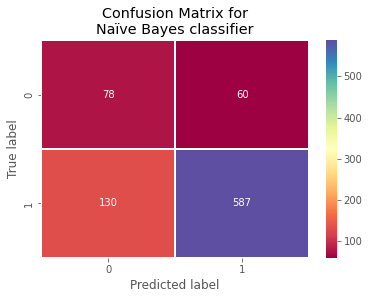

In [ ]:
cf_matrix_NB = confusion_matrix(y_test, y_pred_NB)
sns.heatmap(cf_matrix_NB, linewidths=2, cmap='Spectral', annot=True, fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for\nNaïve Bayes classifier')
plt.show()

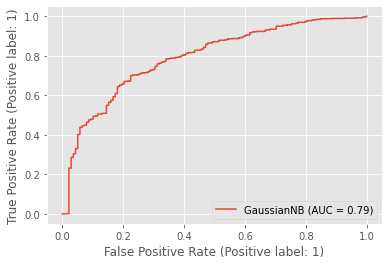

In [ ]:
ROC_NB = RocCurveDisplay.from_estimator(NB, X_test, y_test)

## *5.2 Decision Tree classifier*

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)

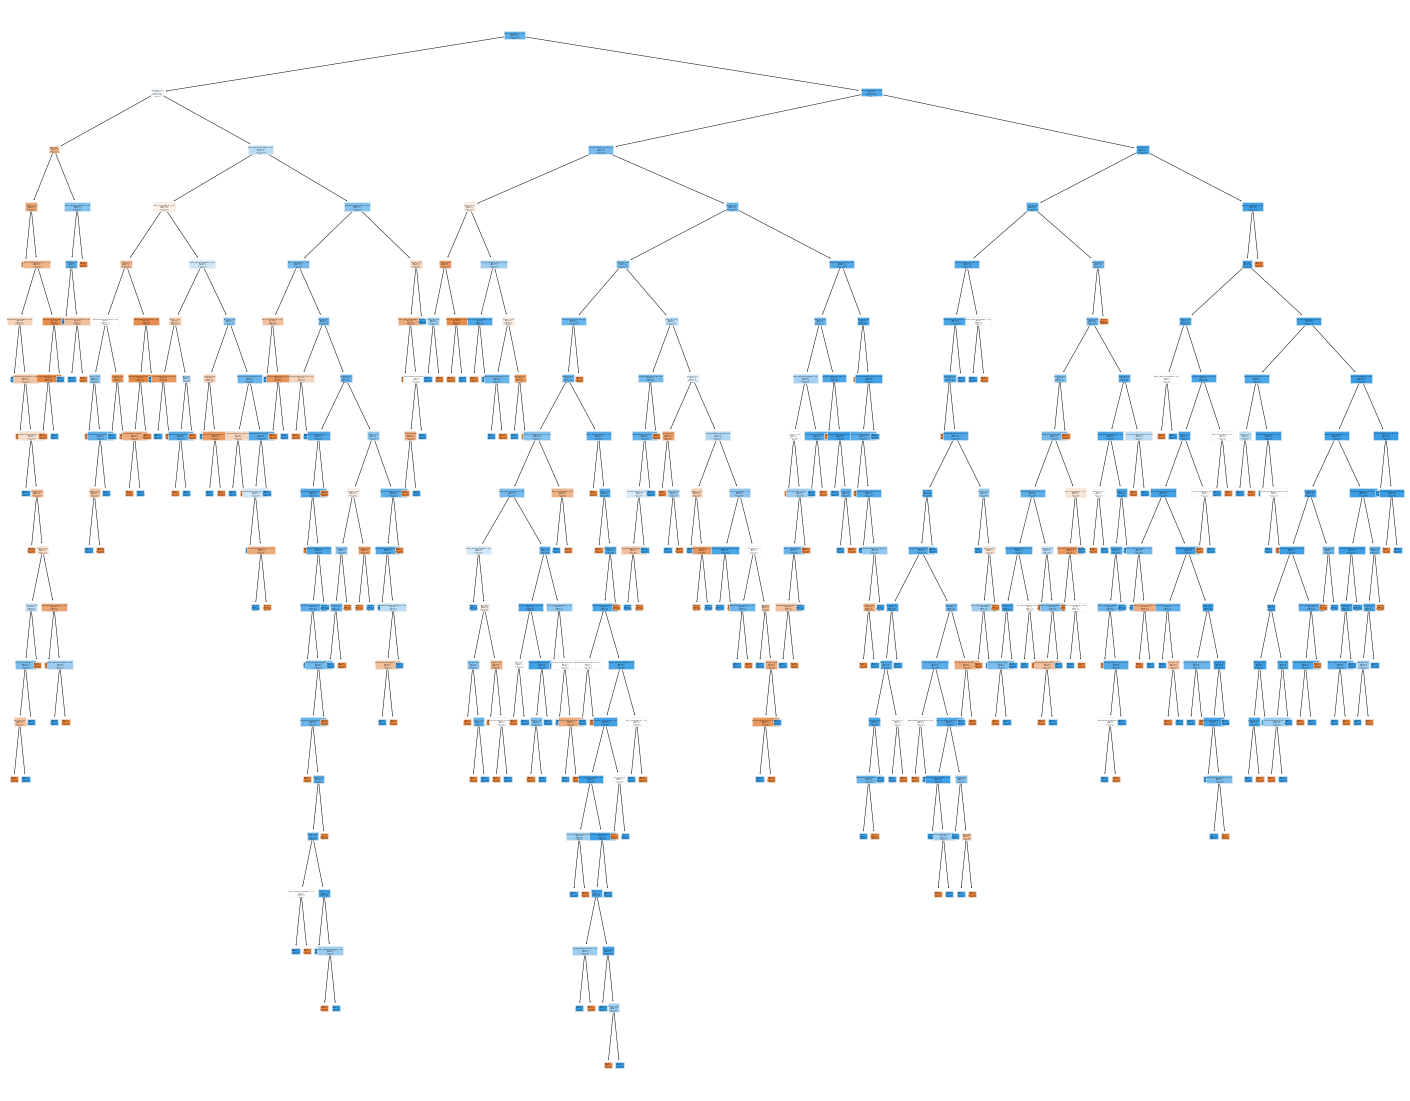

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT,
                   feature_names=X.columns ,
                   class_names=['0','1'],
                   filled=True)


In [ ]:
print("Classification Report for the Decision Tree classifier:\n\n" , classification_report(y_test, y_pred_DT))

Classification Report for the Decision Tree classifier:

               precision    recall  f1-score   support

           0       0.34      0.33      0.33       138
           1       0.87      0.88      0.87       717

    accuracy                           0.79       855
   macro avg       0.60      0.60      0.60       855
weighted avg       0.78      0.79      0.79       855



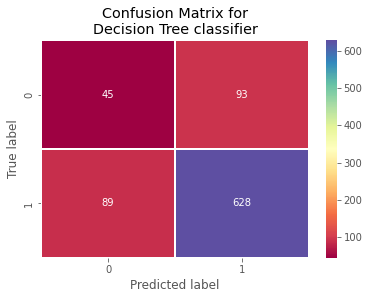

In [ ]:
cf_matrix_DT = confusion_matrix(y_test, y_pred_DT)
sns.heatmap(cf_matrix_DT, linewidths=2, cmap='Spectral', annot=True, fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for\nDecision Tree classifier')
plt.show()

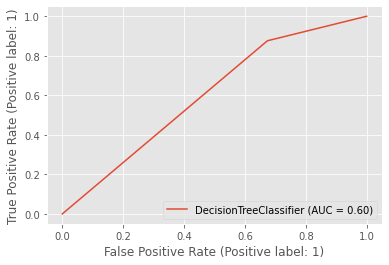

In [ ]:
ROC_DT = RocCurveDisplay.from_estimator(DT, X_test, y_test)

## *5.3 k-Nearest Neighbors classifier*

In [ ]:
kNN = KNeighborsClassifier()
kNN.fit(X_train,y_train)
y_pred_kNN = kNN.predict(X_test)

In [ ]:
print("Classification Report for the k-Nearest Neighbors classifier:\n\n" , classification_report(y_test, y_pred_kNN))

Classification Report for the k-Nearest Neighbors classifier:

               precision    recall  f1-score   support

           0       0.45      0.22      0.29       138
           1       0.86      0.95      0.90       717

    accuracy                           0.83       855
   macro avg       0.66      0.58      0.60       855
weighted avg       0.80      0.83      0.81       855



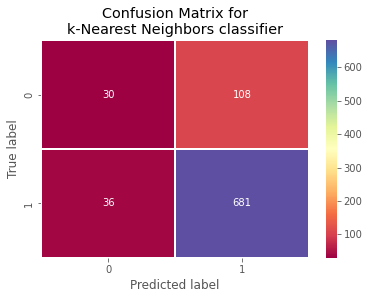

In [ ]:
cf_matrix_kNN = confusion_matrix(y_test, y_pred_kNN)
sns.heatmap(cf_matrix_kNN, linewidths=2, cmap='Spectral', annot=True, fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for\nk-Nearest Neighbors classifier')
plt.show()

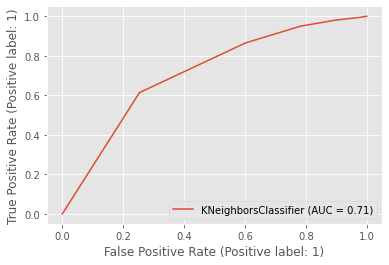

In [ ]:
ROC_kNN = RocCurveDisplay.from_estimator(kNN, X_test, y_test)

## *5.4 Artificial Neural Network (MultiLayer Perceptron)*

In [ ]:
MLP = MLPClassifier(max_iter=500)
MLP.fit(X_train, y_train)
y_pred_MLP = MLP.predict(X_test)

In [ ]:
print("Classification Report for the Artificial Neural Network (MultiLayer Perceptron) classifier:\n\n" , classification_report(y_test, y_pred_MLP))

Classification Report for the Artificial Neural Network (MultiLayer Perceptron) classifier:

               precision    recall  f1-score   support

           0       0.57      0.20      0.29       138
           1       0.86      0.97      0.91       717

    accuracy                           0.85       855
   macro avg       0.72      0.58      0.60       855
weighted avg       0.82      0.85      0.81       855



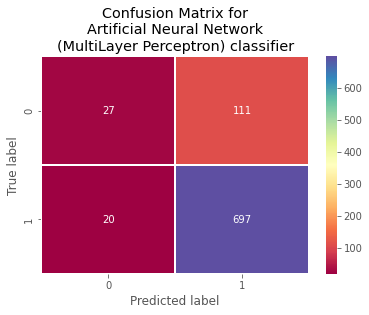

In [ ]:
cf_matrix_MLP = confusion_matrix(y_test, y_pred_MLP)
sns.heatmap(cf_matrix_MLP, linewidths=2, cmap='Spectral', annot=True, fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for\nArtificial Neural Network\n(MultiLayer Perceptron) classifier')
plt.show()

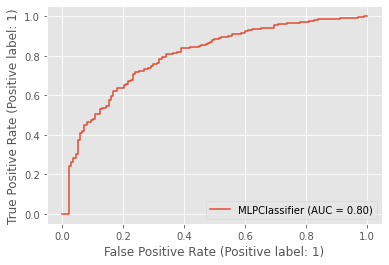

In [ ]:
ROC_MLP = RocCurveDisplay.from_estimator(MLP, X_test, y_test)

# **6. Generalized performance of ANN (MLP)**


In [ ]:
params = {'activation': ['tanh', 'logistic'],
          'hidden_layer_sizes': [(10), (10,10), (8, 8), (8,4,2)],
          'solver': ['adam', 'sgd', 'lbfgs'],
          'learning_rate' : ['constant', 'adaptive', 'invscaling'],
          'max_iter': [500, 1000]
         }

MLP_grid_params = GridSearchCV(MLPClassifier(random_state=42), param_grid=params, n_jobs=-1, cv=5, verbose=5)

In [ ]:
MLP_grid_params.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['tanh', 'logistic'],
                         'hidden_layer_sizes': [10, (10, 10), (8, 8),
                                                (8, 4, 2)],
                         'learning_rate': ['constant', 'adaptive',
                                           'invscaling'],
                         'max_iter': [500, 1000],
                         'solver': ['adam', 'sgd', 'lbfgs']},
             verbose=5)

In [ ]:
print('Train Accuracy: %.4f'%MLP_grid_params.score(X_train, y_train))
print('Test Accuracy: %.4f'%MLP_grid_params.score(X_test, y_test))
print('Best Accuracy Through Grid Search: %.4f'%MLP_grid_params.best_score_)
print('Best Parameters:',MLP_grid_params.best_params_)

Train Accuracy: 0.8606
Test Accuracy: 0.8480
Best Accuracy Through Grid Search: 0.8591
Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}


In [ ]:
MLP_grid = MLPClassifier(activation = 'tanh', hidden_layer_sizes = (10), learning_rate = 'constant', max_iter = 500, solver = 'adam')
MLP_grid.fit(X_train, y_train)
y_pred_MLP_grid = MLP_grid.predict(X_test)

In [ ]:
print("Classification Report for the Artificial Neural Network (MultiLayer Perceptron) classifier:\n\n" , classification_report(y_test, y_pred_MLP_grid))

Classification Report for the Artificial Neural Network (MultiLayer Perceptron) classifier:

               precision    recall  f1-score   support

           0       0.58      0.20      0.30       138
           1       0.86      0.97      0.91       717

    accuracy                           0.85       855
   macro avg       0.72      0.59      0.61       855
weighted avg       0.82      0.85      0.82       855



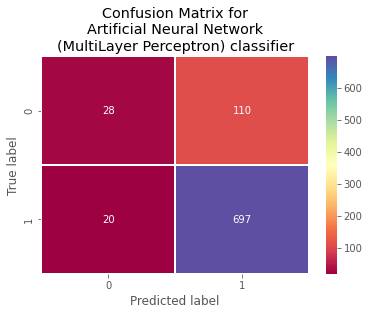

In [ ]:
cf_matrix_MLP_grid = confusion_matrix(y_test, y_pred_MLP_grid)
sns.heatmap(cf_matrix_MLP_grid, linewidths=2, cmap='Spectral', annot=True, fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for\nArtificial Neural Network\n(MultiLayer Perceptron) classifier')
plt.show()

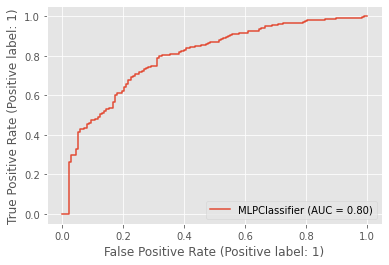

In [ ]:
ROC_MLP_grid = RocCurveDisplay.from_estimator(MLP_grid, X_test, y_test)